### What is Predictive Analysis?

Predictive Analysis is used to analyze current and historical data to make predictions about future or otherwise unknown events.

### Steps of Predictive Analysis:-

1. Define Problem.
2. Data Collection.
3. Data Pre-Processing.
4. EDA.
5. Model.
6. Deploy.

### Applications of Predictive Analysis:-

- Few of them are as follows:
       ->Retail.
       ->Agriculture.
       ->Manufacturing.
       ->E-Commerce.
       ->Sales.
       ->Marketing.
       ->Health Insurance and so on.

### Implementation of MILEAGE PREDICTION

#### Import library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Import Data

In [2]:
df=pd.read_csv('https://github.com/YBI-Foundation/Dataset/raw/main/MPG.csv')

In [3]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [4]:
df.nunique()

mpg             129
cylinders         5
displacement     82
horsepower       93
weight          351
acceleration     95
model_year       13
origin            3
name            305
dtype: int64

#### Data Preprocessing

In [5]:
### first we check for missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [6]:
### then we check for summary statistics
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


In [7]:
### then we find corelation.
df.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
mpg,1.000000,-0.775396,-0.804203,-0.778427,-0.831741,0.420289,0.579267
cylinders,-0.775396,1.000000,0.950721,0.842983,0.896017,-0.505419,-0.348746
displacement,-0.804203,0.950721,1.000000,0.897257,0.932824,-0.543684,-0.370164
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361
weight,-0.831741,0.896017,0.932824,0.864538,1.000000,-0.417457,-0.306564
acceleration,0.420289,-0.505419,-0.543684,-0.689196,-0.417457,1.000000,0.288137
model_year,0.579267,-0.348746,-0.370164,-0.416361,-0.306564,0.288137,1.000000


#### Remove Missing Values.

In [8]:
df=df.dropna()

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model_year    392 non-null    int64  
 7   origin        392 non-null    object 
 8   name          392 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 30.6+ KB


#### Data Visualization

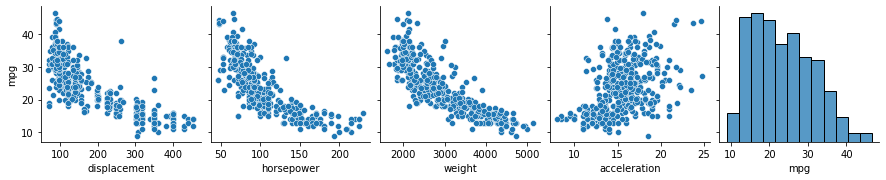

In [10]:
sns.pairplot(df,x_vars=['displacement','horsepower','weight','acceleration','mpg'],y_vars='mpg')

<AxesSubplot:xlabel='displacement', ylabel='mpg'>

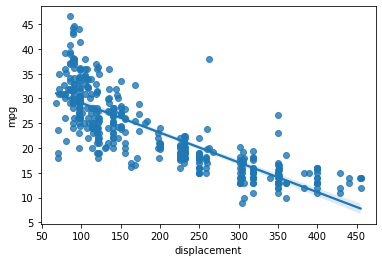

In [11]:
sns.regplot(x='displacement',y='mpg',data=df)

#### Define Target Variable y and Feature X

In [12]:
df.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin', 'name'],
      dtype='object')

In [13]:
y=df['mpg']

In [14]:
y.shape

(392,)

In [15]:
X=df[['displacement','horsepower','weight','acceleration']]

In [16]:
X.shape

(392, 4)

#### Scaling Data

In [17]:
from sklearn.preprocessing import StandardScaler

In [18]:
ss=StandardScaler()

In [19]:
X=ss.fit_transform(X)

#### Train Test Split Data

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.7,random_state=92529)

In [22]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((274, 4), (118, 4), (274,), (118,))

#### Linear Regression Model

In [23]:
from sklearn.linear_model import LinearRegression

In [24]:
lr=LinearRegression()

In [25]:
lr.fit(X_train,y_train)

LinearRegression()

In [26]:
lr.intercept_

23.395118971411257

In [27]:
lr.coef_

array([-0.30422458, -1.07149213, -5.16913187, -0.02232999])

#### Predict Data

In [28]:
y_pred=lr.predict(X_test)

In [29]:
y_pred

array([24.07862166, 11.50918784,  9.32781674, 27.5781478 , 20.1458339 ,
       21.50734397, 20.28134571, 24.8308092 , 23.95144076, 19.17681296,
       20.79096353, 17.42693084, 25.33888171,  8.10714684, 29.81788914,
       19.04832916, 31.21339104, 15.18288159, 26.53252064, 27.66689575,
       25.79530531, 29.53646821, 21.82105905, 30.23239991, 25.58326486,
       24.87676274, 24.5834832 , 21.94038004, 28.91508672, 30.72853978,
       26.44691418, 32.02466769, 25.62259781, 28.81287488, 27.59049004,
       30.7473    , 25.7977385 , 30.01320909, 27.30407429, 11.97032151,
       31.27293245, 28.73248232, 15.10346674, 24.56378042, 26.4452783 ,
       14.56340375, 29.4774204 , 22.71722549, 31.06115103, 23.9961054 ,
       29.66414306, 27.62405088, 25.50282613, 27.54096419, 28.55368099,
       16.46937558, 16.42643374, 23.7329803 , 28.15921622, 25.38302671,
       23.80662032, 31.76636731, 25.77921537, 29.04054922, 28.77116588,
       30.89160015, 27.92799359, 25.42451414, 28.69262588, 15.84

#### Model Accuracy

In [30]:
from sklearn.metrics import mean_absolute_error,mean_absolute_percentage_error,r2_score

In [31]:
mean_absolute_error(y_test,y_pred)

3.4689882776008063

In [32]:
mean_absolute_percentage_error(y_test,y_pred)

0.14282451040485786

In [33]:
r2_score(y_test,y_pred)

0.6486447125071483

### Polynomial Regression

In [34]:
from sklearn.preprocessing import PolynomialFeatures

In [35]:
poly=PolynomialFeatures(degree=2,interaction_only=True,include_bias=False)

In [36]:
X_train2=poly.fit_transform(X_train)

In [37]:
X_test2=poly.fit_transform(X_test)

In [38]:
lr.fit(X_train2,y_train)

LinearRegression()

In [39]:
lr.intercept_

21.306378528697664

In [40]:
lr.coef_

array([-2.00781415, -4.33894754, -2.41823198, -0.95551274,  0.97034198,
        0.61208121,  0.12592739,  0.51180757, -0.74259299,  0.70380647])

In [41]:
y_pred_poly=lr.predict(X_test2)

#### Model accuracy

In [42]:
from sklearn.metrics import mean_absolute_error,mean_absolute_percentage_error,r2_score

In [43]:
mean_absolute_error(y_test,y_pred_poly)

3.0087220586709216

In [44]:
mean_absolute_percentage_error(y_test,y_pred_poly)

0.11958733007536301

In [45]:
r2_score(y_test,y_pred_poly)

0.7282560209690802

<br/>

### CLASSIFICATION

#### Hand written digit prediction - Classification Analysis

#### Import library

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#### Import Data

In [48]:
from sklearn.datasets import load_digits

In [49]:
df=load_digits()

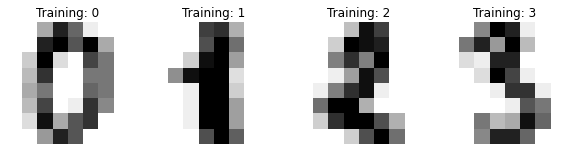

In [54]:
_, axes=plt.subplots(nrows=1,ncols=4,figsize=(10,3))
for ax,image,label in zip(axes,df.images,df.target):
    ax.set_axis_off()
    ax.imshow(image,cmap=plt.cm.gray_r,interpolation="nearest")
    ax.set_title("Training: %i" %label)

#### Data Preprocessing

#### Flatten Image

In [55]:
df.images.shape

(1797, 8, 8)

In [56]:
df.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [57]:
df.images[0].shape

(8, 8)

In [58]:
n_samples=len(df.images)
data=df.images.reshape((n_samples,-1))

In [59]:
data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [60]:
data[0].shape

(64,)

In [61]:
data.shape

(1797, 64)

#### Scaling Data

In [62]:
data.min()

0.0

In [63]:
data.max()

16.0

In [64]:
data=data/16

In [65]:
data.min()

0.0

In [66]:
data.max()

1.0

#### Train Test Split Data

In [67]:
from sklearn.model_selection import train_test_split

In [77]:
X_train,X_test,y_train,y_test=train_test_split(data,df.target,test_size=0.7,random_state=92529)

In [78]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((539, 64), (1258, 64), (539,), (1258,))

#### Random Forest Model

In [79]:
from sklearn.ensemble import RandomForestClassifier

In [80]:
rf=RandomForestClassifier()

In [81]:
rf.fit(X_train,y_train)

RandomForestClassifier()

#### Predict Test Data

In [82]:
y_pred=rf.predict(X_test)

In [83]:
y_pred

array([6, 5, 7, ..., 2, 6, 0])

#### Model Accuracy

In [84]:
from sklearn.metrics import confusion_matrix,classification_report

In [85]:
confusion_matrix(y_test,y_pred)

array([[122,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0, 116,   0,   1,   0,   0,   0,   0,   0,   0],
       [  1,   2, 121,   0,   0,   0,   0,   1,   1,   2],
       [  0,   2,   0, 123,   0,   1,   0,   4,   1,   1],
       [  0,   2,   0,   0, 121,   0,   0,   0,   0,   2],
       [  0,   1,   0,   1,   2, 122,   1,   0,   0,  10],
       [  1,   1,   0,   0,   1,   1, 121,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0, 121,   1,   1],
       [  0,   8,   1,   0,   1,   0,   0,   1, 108,   1],
       [  0,   1,   0,   1,   1,   2,   0,   0,   1, 123]], dtype=int64)

In [86]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       122
           1       0.87      0.99      0.93       117
           2       0.99      0.95      0.97       128
           3       0.98      0.93      0.95       132
           4       0.96      0.97      0.96       125
           5       0.97      0.89      0.93       137
           6       0.99      0.97      0.98       125
           7       0.95      0.98      0.97       123
           8       0.96      0.90      0.93       120
           9       0.88      0.95      0.91       129

    accuracy                           0.95      1258
   macro avg       0.95      0.95      0.95      1258
weighted avg       0.95      0.95      0.95      1258

